In [1]:
import cPickle
from PIL import Image
import os
import sys
import numpy as np
from matplotlib.pyplot import imshow
import tensorflow as tf


data_folder = 'cifar-10-batches-py'
print os.listdir(data_folder)

['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch']


In [2]:
train_batch_1 = os.path.join(data_folder, 'data_batch_1')
train_batch_2 = os.path.join(data_folder, 'data_batch_2')
train_batch_3 = os.path.join(data_folder, 'data_batch_3')
train_batch_4 = os.path.join(data_folder, 'data_batch_4')
train_batch_5 = os.path.join(data_folder, 'data_batch_5')
test_batch = os.path.join(data_folder, 'test_batch')

In [3]:
def read_batch(filename):
    with open(filename, 'r') as f:
        data = cPickle.load(f)
    return data

In [4]:
d1 = read_batch(train_batch_1)
print type(d1)
print d1.keys()
data1 = d1['data']
labels1 = d1['labels']
batch_label1 = d1['batch_label']
filenames1 = d1['filenames']
print type(data1), type(labels1), type(batch_label1), type(filenames1)

print data1.shape
print len(labels1)
print batch_label1
print len(filenames1)

print data1[0:3]
print labels1[0:3]
print filenames1[0:3]

<type 'dict'>
['data', 'labels', 'batch_label', 'filenames']
<type 'numpy.ndarray'> <type 'list'> <type 'str'> <type 'list'>
(10000, 3072)
10000
training batch 1 of 5
10000
[[ 59  43  50 ... 140  84  72]
 [154 126 105 ... 139 142 144]
 [255 253 253 ...  83  83  84]]
[6, 9, 9]
['leptodactylus_pentadactylus_s_000004.png', 'camion_s_000148.png', 'tipper_truck_s_001250.png']


(32, 32, 3)
(32, 32)


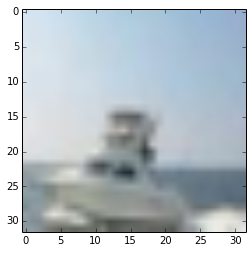

In [5]:
%matplotlib inline
example_image_np = data1[100]
example_image_np = example_image_np.reshape((3, 32, 32))
example_image_np = np.swapaxes(example_image_np, 0, 2)
example_image_np = np.swapaxes(example_image_np, 0, 1)
print example_image_np.shape
imshow(example_image_np)
example_image = Image.fromarray(example_image_np)
print example_image.size

In [8]:
train_filenames = [train_batch_1, train_batch_2, train_batch_3, train_batch_4, train_batch_5]
train_data_arr = []
train_labels = []
train_img_filenames = []
for filename in train_filenames:
    d = read_batch(filename)
    data = d['data']
    labels = d['labels']
    filenames = d['filenames']
    train_data_arr.append(data)
    train_labels.extend(labels)
    train_img_filenames.extend(filenames)
train_data = np.vstack(train_data_arr)
print train_data.shape
print len(train_labels)
print len(train_img_filenames)

test_d = read_batch(test_batch)
test_data = test_d['data']
test_labels = test_d['labels']
test_img_filenames = test_d['filenames']
print test_data.shape
print len(test_labels)
print len(test_img_filenames)

(50000, 3072)
50000
50000
(10000, 3072)
10000
10000


In [12]:
def generate_images(data, labels, filenames, output_img_dir, output_filenames_file):
    assert len(data) == len(labels)
    assert len(data) == len(filenames)
    num_examples = data.shape[0]
    
    if not os.path.exists(output_img_dir):
        os.mkdir(output_img_dir)
    
    data = data.reshape((num_examples, 3, 32, 32))
    data = np.swapaxes(data, 1, 3)
    data = np.swapaxes(data, 1, 2)
    
    out_f = open(output_filenames_file, 'w')
    for label, img_arr, filename in zip(labels, data, filenames):
        output_img_filename = os.path.join(output_img_dir, filename)
        img = Image.fromarray(img_arr)
        img.save(output_img_filename)
        line = '%s\t%d\n' % (output_img_filename, label)
        out_f.write(line)
    out_f.close()

generate_images(
    test_data,
    test_labels,
    test_img_filenames,
    "images/test_images",
    "images/test_filemapping")
generate_images(
    train_data,
    train_labels,
    train_img_filenames,
    "images/train_images",
    "images/train_filemapping")